In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from PrepareData import prepare_dataset
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import os

## Prepare dataset

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_dataset()

/home/simon/Dissertation/Abalone/PrepareData.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_test[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']])
/home/simon/miniconda3/envs/diss/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(3383, 10) (3383,)
(376, 10) (376,)
(418, 10) (418,)


In [9]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([1, 2])

In [5]:
np.random.seed(1337)

## Linear model

In [11]:
model_lin = keras.Sequential([
    keras.layers.Dense(1, input_shape=(10,)),
])
optimizer = tf.train.GradientDescentOptimizer(0.001)
model_lin.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [12]:
history_lin = model_lin.fit(X_train, y_train, epochs=200, validation_data=[X_val, y_val])

Train on 3383 samples, validate on 376 samples
Epoch 1/200
3383/3383 [==============================] - 1s 194us/step - loss: 86.1086 - mean_absolute_error: 8.6949 - val_loss: 63.1629 - val_mean_absolute_error: 7.4668
Epoch 2/200
3383/3383 [==============================] - 0s 45us/step - loss: 50.4773 - mean_absolute_error: 6.5492 - val_loss: 38.6151 - val_mean_absolute_error: 5.6306
Epoch 3/200
3383/3383 [==============================] - 0s 76us/step - loss: 31.5219 - mean_absolute_error: 4.9441 - val_loss: 24.7441 - val_mean_absolute_error: 4.2393
Epoch 4/200
3383/3383 [==============================] - 0s 87us/step - loss: 20.7914 - mean_absolute_error: 3.7394 - val_loss: 16.8539 - val_mean_absolute_error: 3.2274
Epoch 5/200
3383/3383 [==============================] - 0s 62us/step - loss: 14.6774 - mean_absolute_error: 2.8816 - val_loss: 12.3247 - val_mean_absolute_error: 2.5317
Epoch 6/200
3383/3383 [==============================] - 0s 55us/step - loss: 11.1681 - mean_absolute_

Epoch 49/200
3383/3383 [==============================] - 0s 68us/step - loss: 5.1201 - mean_absolute_error: 1.6091 - val_loss: 4.9372 - val_mean_absolute_error: 1.5988
Epoch 50/200
3383/3383 [==============================] - 0s 45us/step - loss: 5.1127 - mean_absolute_error: 1.6086 - val_loss: 4.9258 - val_mean_absolute_error: 1.5971
Epoch 51/200
3383/3383 [==============================] - 0s 43us/step - loss: 5.1041 - mean_absolute_error: 1.6084 - val_loss: 4.9187 - val_mean_absolute_error: 1.5953
Epoch 52/200
3383/3383 [==============================] - 0s 49us/step - loss: 5.0956 - mean_absolute_error: 1.6056 - val_loss: 4.9084 - val_mean_absolute_error: 1.5940
Epoch 53/200
3383/3383 [==============================] - 0s 45us/step - loss: 5.0879 - mean_absolute_error: 1.6055 - val_loss: 4.9012 - val_mean_absolute_error: 1.5926
Epoch 54/200
3383/3383 [==============================] - 0s 46us/step - loss: 5.0803 - mean_absolute_error: 1.6037 - val_loss: 4.9012 - val_mean_absolute_

Epoch 145/200
3383/3383 [==============================] - 0s 40us/step - loss: 4.9141 - mean_absolute_error: 1.5869 - val_loss: 4.7764 - val_mean_absolute_error: 1.5739
Epoch 146/200
3383/3383 [==============================] - 0s 44us/step - loss: 4.9134 - mean_absolute_error: 1.5871 - val_loss: 4.7811 - val_mean_absolute_error: 1.5737
Epoch 147/200
3383/3383 [==============================] - 0s 43us/step - loss: 4.9129 - mean_absolute_error: 1.5858 - val_loss: 4.7809 - val_mean_absolute_error: 1.5741
Epoch 148/200
3383/3383 [==============================] - 0s 52us/step - loss: 4.9122 - mean_absolute_error: 1.5858 - val_loss: 4.7825 - val_mean_absolute_error: 1.5741
Epoch 149/200
3383/3383 [==============================] - 0s 42us/step - loss: 4.9126 - mean_absolute_error: 1.5865 - val_loss: 4.7807 - val_mean_absolute_error: 1.5738
Epoch 150/200
3383/3383 [==============================] - 0s 43us/step - loss: 4.9119 - mean_absolute_error: 1.5853 - val_loss: 4.7761 - val_mean_abs

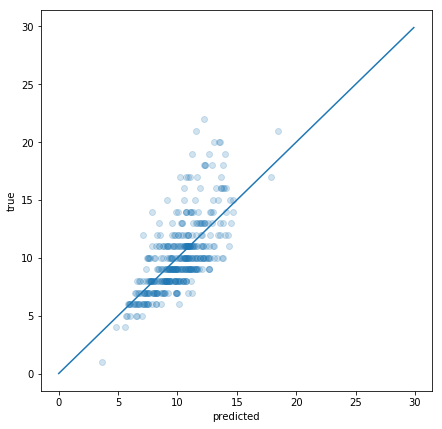

In [13]:
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111)
ax.scatter(model_lin.predict(X_test), y_test, alpha=0.2)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
ax.plot(np.arange(0, 30, 0.1), np.arange(0, 30, 0.1))

## 1 layer - sigmoid

In [38]:
model_sig = keras.Sequential([
    keras.layers.Dense(3, input_shape=(10,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('sigmoid'),
    keras.layers.Dense(1)
])
optimizer = tf.train.GradientDescentOptimizer(0.001)
model_sig.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [40]:
history_sig = model_sig.fit(X_train, y_train, epochs=300, validation_data=[X_val, y_val])

Train on 3383 samples, validate on 376 samples
Epoch 1/300
3383/3383 [==============================] - 0s 56us/step - loss: 4.8205 - mean_absolute_error: 1.5723 - val_loss: 4.2913 - val_mean_absolute_error: 1.5227
Epoch 2/300
3383/3383 [==============================] - 0s 51us/step - loss: 4.8071 - mean_absolute_error: 1.5647 - val_loss: 4.2936 - val_mean_absolute_error: 1.5388
Epoch 3/300
3383/3383 [==============================] - 0s 53us/step - loss: 4.6936 - mean_absolute_error: 1.5499 - val_loss: 4.2815 - val_mean_absolute_error: 1.5350
Epoch 4/300
3383/3383 [==============================] - 0s 52us/step - loss: 4.8085 - mean_absolute_error: 1.5659 - val_loss: 4.2659 - val_mean_absolute_error: 1.5265
Epoch 5/300
3383/3383 [==============================] - 0s 54us/step - loss: 4.8061 - mean_absolute_error: 1.5671 - val_loss: 4.3659 - val_mean_absolute_error: 1.5359
Epoch 6/300
3383/3383 [==============================] - 0s 57us/step - loss: 4.7308 - mean_absolute_error: 1.558

3383/3383 [==============================] - 0s 70us/step - loss: 4.6889 - mean_absolute_error: 1.5509 - val_loss: 4.2691 - val_mean_absolute_error: 1.5164
Epoch 98/300
3383/3383 [==============================] - 0s 50us/step - loss: 4.7570 - mean_absolute_error: 1.5534 - val_loss: 4.2243 - val_mean_absolute_error: 1.5087
Epoch 99/300
3383/3383 [==============================] - 0s 54us/step - loss: 4.6586 - mean_absolute_error: 1.5364 - val_loss: 4.3195 - val_mean_absolute_error: 1.5245
Epoch 100/300
3383/3383 [==============================] - 0s 53us/step - loss: 4.6768 - mean_absolute_error: 1.5423 - val_loss: 4.2009 - val_mean_absolute_error: 1.5145
Epoch 101/300
3383/3383 [==============================] - 0s 82us/step - loss: 4.6563 - mean_absolute_error: 1.5312 - val_loss: 4.2088 - val_mean_absolute_error: 1.5081
Epoch 102/300
3383/3383 [==============================] - 0s 83us/step - loss: 4.5908 - mean_absolute_error: 1.5373 - val_loss: 4.2572 - val_mean_absolute_error: 1.5

3383/3383 [==============================] - 0s 52us/step - loss: 4.6398 - mean_absolute_error: 1.5435 - val_loss: 4.1386 - val_mean_absolute_error: 1.4960
Epoch 194/300
3383/3383 [==============================] - 0s 50us/step - loss: 4.5909 - mean_absolute_error: 1.5290 - val_loss: 4.1437 - val_mean_absolute_error: 1.4999
Epoch 195/300
3383/3383 [==============================] - 0s 49us/step - loss: 4.5950 - mean_absolute_error: 1.5295 - val_loss: 4.1407 - val_mean_absolute_error: 1.5017
Epoch 196/300
3383/3383 [==============================] - 0s 49us/step - loss: 4.6310 - mean_absolute_error: 1.5286 - val_loss: 4.2708 - val_mean_absolute_error: 1.5123
Epoch 197/300
3383/3383 [==============================] - 0s 49us/step - loss: 4.6444 - mean_absolute_error: 1.5377 - val_loss: 4.1370 - val_mean_absolute_error: 1.4988
Epoch 198/300
3383/3383 [==============================] - 0s 50us/step - loss: 4.5623 - mean_absolute_error: 1.5177 - val_loss: 4.1473 - val_mean_absolute_error: 1

Epoch 241/300
3383/3383 [==============================] - 0s 81us/step - loss: 4.6718 - mean_absolute_error: 1.5362 - val_loss: 4.4437 - val_mean_absolute_error: 1.6033
Epoch 242/300
3383/3383 [==============================] - 0s 78us/step - loss: 4.6731 - mean_absolute_error: 1.5448 - val_loss: 4.1747 - val_mean_absolute_error: 1.4973
Epoch 243/300
3383/3383 [==============================] - 0s 62us/step - loss: 4.6519 - mean_absolute_error: 1.5333 - val_loss: 4.1612 - val_mean_absolute_error: 1.5030
Epoch 244/300
3383/3383 [==============================] - 0s 64us/step - loss: 4.6085 - mean_absolute_error: 1.5275 - val_loss: 4.1961 - val_mean_absolute_error: 1.4992
Epoch 245/300
3383/3383 [==============================] - 0s 88us/step - loss: 4.5880 - mean_absolute_error: 1.5220 - val_loss: 4.2889 - val_mean_absolute_error: 1.5152
Epoch 246/300
3383/3383 [==============================] - 0s 77us/step - loss: 4.5895 - mean_absolute_error: 1.5189 - val_loss: 4.1798 - val_mean_abs

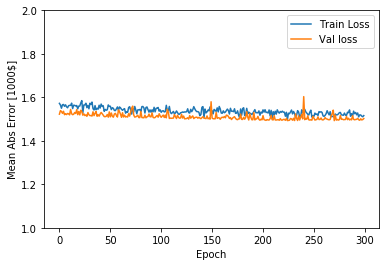

In [41]:
plot_history(history_sig)

In [47]:
weights_sig = model_sig.get_weights()
np.save('model_sig_weights', weights_sig, allow_pickle=True)

## 1 layer - relu

In [33]:
model1 = keras.Sequential([
    keras.layers.Dense(3, input_shape=(10,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(1)
])
optimizer = tf.train.AdamOptimizer(0.001)
model1.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [34]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 3)                 33        
_________________________________________________________________
batch_normalization_7 (Batch (None, 3)                 12        
_________________________________________________________________
activation_7 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 4         
Total params: 49
Trainable params: 43
Non-trainable params: 6
_________________________________________________________________


In [35]:
history1 = model1.fit(X_train, y_train, epochs=400, validation_data=[X_val, y_val])

Train on 3383 samples, validate on 376 samples
Epoch 1/400
3383/3383 [==============================] - 1s 279us/step - loss: 95.5774 - mean_absolute_error: 9.1634 - val_loss: 90.5985 - val_mean_absolute_error: 8.9479
Epoch 2/400
3383/3383 [==============================] - 0s 58us/step - loss: 86.3449 - mean_absolute_error: 8.6859 - val_loss: 78.5011 - val_mean_absolute_error: 8.2921
Epoch 3/400
3383/3383 [==============================] - 0s 58us/step - loss: 76.7656 - mean_absolute_error: 8.1414 - val_loss: 69.7157 - val_mean_absolute_error: 7.8263
Epoch 4/400
3383/3383 [==============================] - 0s 63us/step - loss: 66.0079 - mean_absolute_error: 7.5518 - val_loss: 60.2240 - val_mean_absolute_error: 7.2370
Epoch 5/400
3383/3383 [==============================] - 0s 56us/step - loss: 55.6265 - mean_absolute_error: 6.8816 - val_loss: 49.9389 - val_mean_absolute_error: 6.5280
Epoch 6/400
3383/3383 [==============================] - 0s 62us/step - loss: 45.6159 - mean_absolute_

3383/3383 [==============================] - 0s 56us/step - loss: 5.1464 - mean_absolute_error: 1.6464 - val_loss: 4.6883 - val_mean_absolute_error: 1.5977
Epoch 50/400
3383/3383 [==============================] - 0s 52us/step - loss: 5.1296 - mean_absolute_error: 1.6546 - val_loss: 4.6731 - val_mean_absolute_error: 1.5882
Epoch 51/400
3383/3383 [==============================] - 0s 52us/step - loss: 5.2228 - mean_absolute_error: 1.6665 - val_loss: 4.7277 - val_mean_absolute_error: 1.5983
Epoch 52/400
3383/3383 [==============================] - 0s 54us/step - loss: 5.1208 - mean_absolute_error: 1.6538 - val_loss: 4.6547 - val_mean_absolute_error: 1.5880
Epoch 53/400
3383/3383 [==============================] - 0s 51us/step - loss: 5.0816 - mean_absolute_error: 1.6280 - val_loss: 4.6925 - val_mean_absolute_error: 1.5957
Epoch 54/400
3383/3383 [==============================] - 0s 53us/step - loss: 5.1336 - mean_absolute_error: 1.6611 - val_loss: 4.6404 - val_mean_absolute_error: 1.5791

3383/3383 [==============================] - 0s 52us/step - loss: 4.9064 - mean_absolute_error: 1.6062 - val_loss: 4.5848 - val_mean_absolute_error: 1.5413
Epoch 146/400
3383/3383 [==============================] - 0s 53us/step - loss: 5.0006 - mean_absolute_error: 1.6216 - val_loss: 4.5282 - val_mean_absolute_error: 1.5366
Epoch 147/400
3383/3383 [==============================] - 0s 52us/step - loss: 4.8562 - mean_absolute_error: 1.5964 - val_loss: 4.5782 - val_mean_absolute_error: 1.5446
Epoch 148/400
3383/3383 [==============================] - 0s 52us/step - loss: 4.9199 - mean_absolute_error: 1.6139 - val_loss: 4.5032 - val_mean_absolute_error: 1.5360
Epoch 149/400
3383/3383 [==============================] - 0s 54us/step - loss: 5.0022 - mean_absolute_error: 1.6170 - val_loss: 4.5413 - val_mean_absolute_error: 1.5395
Epoch 150/400
3383/3383 [==============================] - 0s 52us/step - loss: 4.9408 - mean_absolute_error: 1.6121 - val_loss: 4.6503 - val_mean_absolute_error: 1

3383/3383 [==============================] - 0s 52us/step - loss: 4.8818 - mean_absolute_error: 1.5957 - val_loss: 4.4528 - val_mean_absolute_error: 1.5212
Epoch 242/400
3383/3383 [==============================] - 0s 52us/step - loss: 4.7895 - mean_absolute_error: 1.5836 - val_loss: 4.4844 - val_mean_absolute_error: 1.5194
Epoch 243/400
3383/3383 [==============================] - 0s 52us/step - loss: 4.9411 - mean_absolute_error: 1.6054 - val_loss: 4.4316 - val_mean_absolute_error: 1.5105
Epoch 244/400
3383/3383 [==============================] - 0s 53us/step - loss: 4.8432 - mean_absolute_error: 1.5850 - val_loss: 4.5604 - val_mean_absolute_error: 1.5295
Epoch 245/400
3383/3383 [==============================] - 0s 53us/step - loss: 4.8262 - mean_absolute_error: 1.5880 - val_loss: 4.4114 - val_mean_absolute_error: 1.5297
Epoch 246/400
3383/3383 [==============================] - 0s 52us/step - loss: 4.7941 - mean_absolute_error: 1.5821 - val_loss: 4.5261 - val_mean_absolute_error: 1

3383/3383 [==============================] - 0s 94us/step - loss: 5.0143 - mean_absolute_error: 1.6231 - val_loss: 4.4257 - val_mean_absolute_error: 1.5279
Epoch 338/400
3383/3383 [==============================] - 0s 82us/step - loss: 4.8123 - mean_absolute_error: 1.5850 - val_loss: 4.4419 - val_mean_absolute_error: 1.5293
Epoch 339/400
3383/3383 [==============================] - 0s 77us/step - loss: 4.8833 - mean_absolute_error: 1.5900 - val_loss: 4.4475 - val_mean_absolute_error: 1.5346
Epoch 340/400
3383/3383 [==============================] - 0s 69us/step - loss: 4.8409 - mean_absolute_error: 1.5890 - val_loss: 4.4317 - val_mean_absolute_error: 1.5195
Epoch 341/400
3383/3383 [==============================] - 0s 92us/step - loss: 4.9117 - mean_absolute_error: 1.6080 - val_loss: 4.4263 - val_mean_absolute_error: 1.5306
Epoch 342/400
3383/3383 [==============================] - 0s 86us/step - loss: 4.7738 - mean_absolute_error: 1.5730 - val_loss: 4.4255 - val_mean_absolute_error: 1

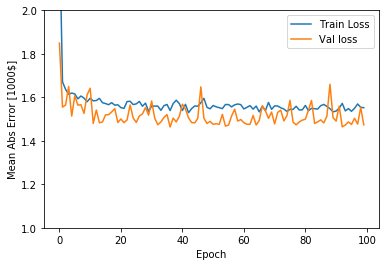

In [19]:
plot_history(history1)

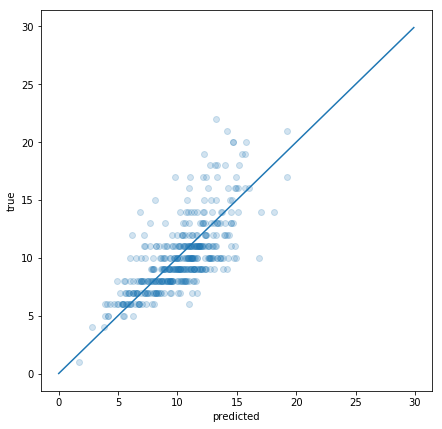

In [45]:
pred = model1.predict(X_test)
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111)
ax.scatter(pred, y_test, alpha=0.2)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
ax.plot(np.arange(0, 30, 0.1), np.arange(0, 30, 0.1))

## 2 layers - relu

In [41]:
model2 = keras.Sequential([
    keras.layers.Dense(30, activation=tf.nn.relu, input_shape=(10,)),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.relu)
])
optimizer = tf.train.GradientDescentOptimizer(0.01)
model2.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [42]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 155       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 6         
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [46]:
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=[X_val, y_val])

Train on 3383 samples, validate on 376 samples
Epoch 1/100
3383/3383 [==============================] - 0s 104us/step - loss: 14.0064 - mean_absolute_error: 2.4221 - val_loss: 4.8140 - val_mean_absolute_error: 1.6039
Epoch 2/100
3383/3383 [==============================] - 0s 50us/step - loss: 5.8237 - mean_absolute_error: 1.6977 - val_loss: 5.1605 - val_mean_absolute_error: 1.7443
Epoch 3/100
3383/3383 [==============================] - 0s 49us/step - loss: 5.4439 - mean_absolute_error: 1.6835 - val_loss: 5.5748 - val_mean_absolute_error: 1.8423
Epoch 4/100
3383/3383 [==============================] - 0s 44us/step - loss: 5.0803 - mean_absolute_error: 1.6192 - val_loss: 4.4775 - val_mean_absolute_error: 1.5867
Epoch 5/100
3383/3383 [==============================] - 0s 44us/step - loss: 5.0405 - mean_absolute_error: 1.6239 - val_loss: 5.2055 - val_mean_absolute_error: 1.7791
Epoch 6/100
3383/3383 [==============================] - 0s 55us/step - loss: 4.9537 - mean_absolute_error: 1.6

3383/3383 [==============================] - 0s 84us/step - loss: 4.1970 - mean_absolute_error: 1.4551 - val_loss: 4.2468 - val_mean_absolute_error: 1.5455
Epoch 98/100
3383/3383 [==============================] - 0s 67us/step - loss: 4.0973 - mean_absolute_error: 1.4356 - val_loss: 4.1683 - val_mean_absolute_error: 1.4799
Epoch 99/100
3383/3383 [==============================] - 0s 47us/step - loss: 4.1451 - mean_absolute_error: 1.4382 - val_loss: 4.3385 - val_mean_absolute_error: 1.5086
Epoch 100/100
3383/3383 [==============================] - 0s 42us/step - loss: 4.1206 - mean_absolute_error: 1.4437 - val_loss: 4.1063 - val_mean_absolute_error: 1.4787


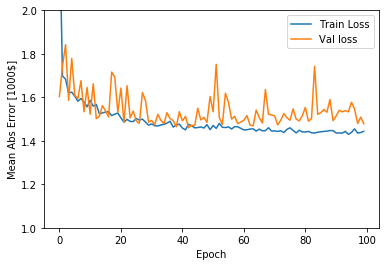

In [47]:
plot_history(history2)

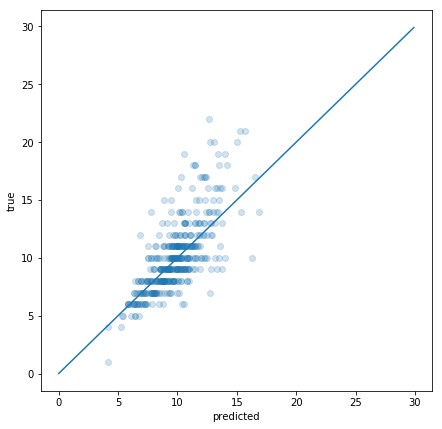

In [48]:
pred = model2.predict(X_test)
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111)
ax.scatter(pred, y_test, alpha=0.2)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
ax.plot(np.arange(0, 30, 0.1), np.arange(0, 30, 0.1))

## Save weights

In [49]:
weights_lin = model_lin.get_weights()
weights_sig = model_sig.get_weights()
weights1 = model1.get_weights()
weights2 = model2.get_weights()

In [50]:
np.save('model_lin_weights', weights_lin, allow_pickle=True)
np.save('model_sig_weights', weights_sig, allow_pickle=True)
np.save('model1_weights', weights1, allow_pickle=True)
np.save('model2_weights', weights2, allow_pickle=True)